In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# Configurar estilo
sns.set(style="whitegrid")

In [3]:
url = "https://raw.githubusercontent.com/shotokan/diabetes-classifier/refs/heads/main/4_classification_diabetes.csv"
df = pd.read_csv(url)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
# Renombrar columnas para mayor claridad
df.columns = ["Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke",
              "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump",
              "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
              "Sex", "Age", "Education", "Income"]

In [5]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# --- HIPÓTESIS Y GRÁFICOS ---

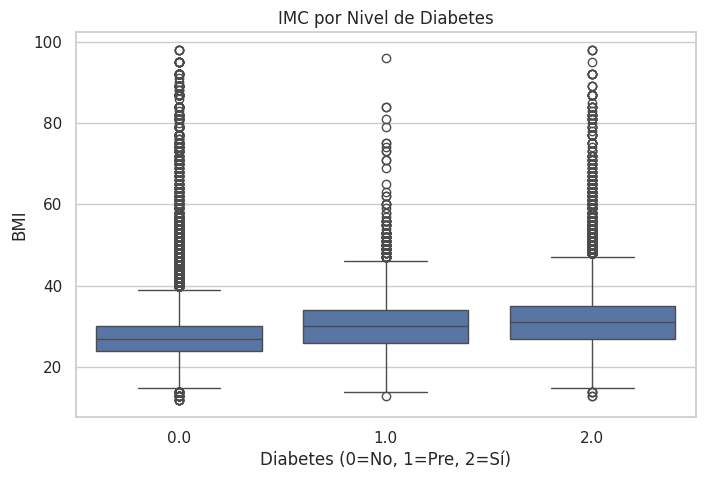

In [6]:
# 1. Obesidad y diabetes
plt.figure(figsize=(8, 5))
sns.boxplot(x="Diabetes_012", y="BMI", data=df)
plt.title("IMC por Nivel de Diabetes")
plt.xlabel("Diabetes (0=No, 1=Pre, 2=Sí)")
plt.ylabel("BMI")
plt.show()

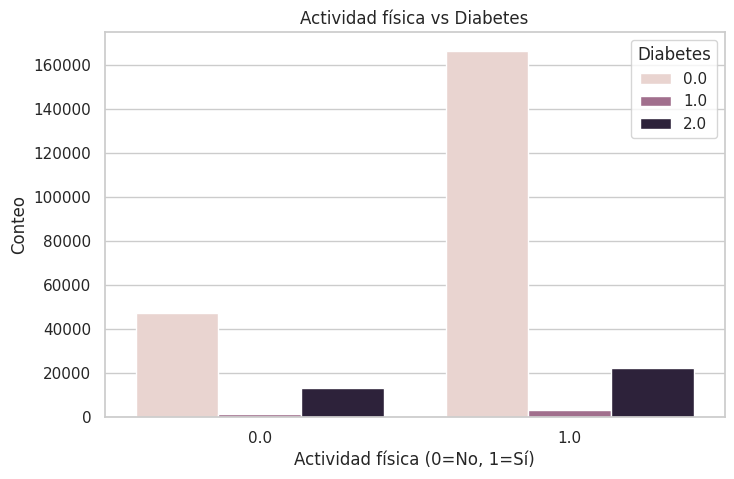

In [7]:
# 2. Actividad física y diabetes
plt.figure(figsize=(8, 5))
sns.countplot(x="PhysActivity", hue="Diabetes_012", data=df)
plt.title("Actividad física vs Diabetes")
plt.xlabel("Actividad física (0=No, 1=Sí)")
plt.ylabel("Conteo")
plt.legend(title="Diabetes")
plt.show()

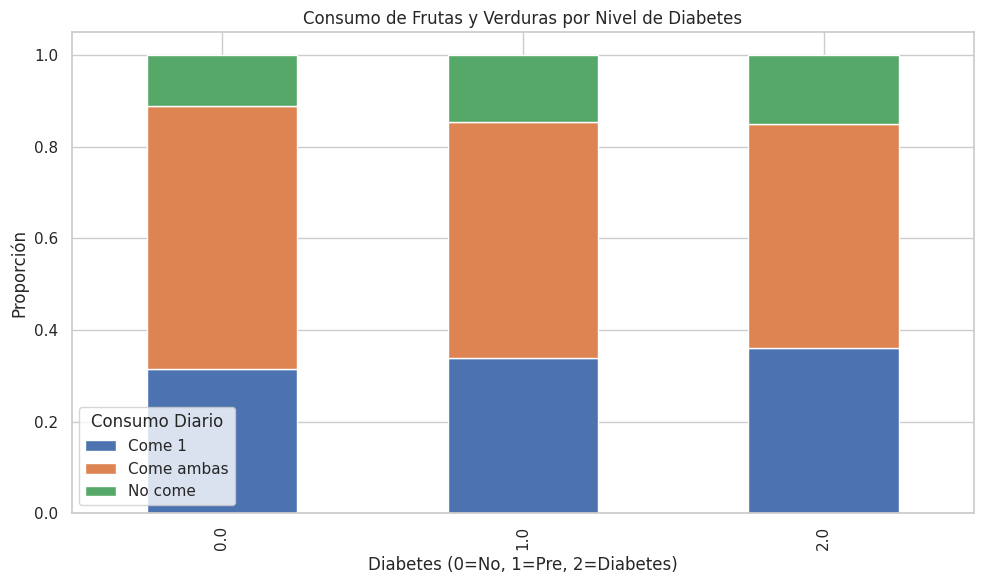

In [27]:
# Crear categorías combinadas para frutas y verduras
df["FrutasYVerduras"] = df["Fruits"] + df["Veggies"]
df["Consumo"] = df["FrutasYVerduras"].map({0: "No come", 1: "Come 1", 2: "Come ambas"})

# Crear tabla cruzada
tabla = pd.crosstab(df["Diabetes_012"], df["Consumo"], normalize='index')

# Graficar
tabla.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Consumo de Frutas y Verduras por Nivel de Diabetes")
plt.xlabel("Diabetes (0=No, 1=Pre, 2=Diabetes)")
plt.ylabel("Proporción")
plt.legend(title="Consumo Diario")
plt.tight_layout()
plt.show()

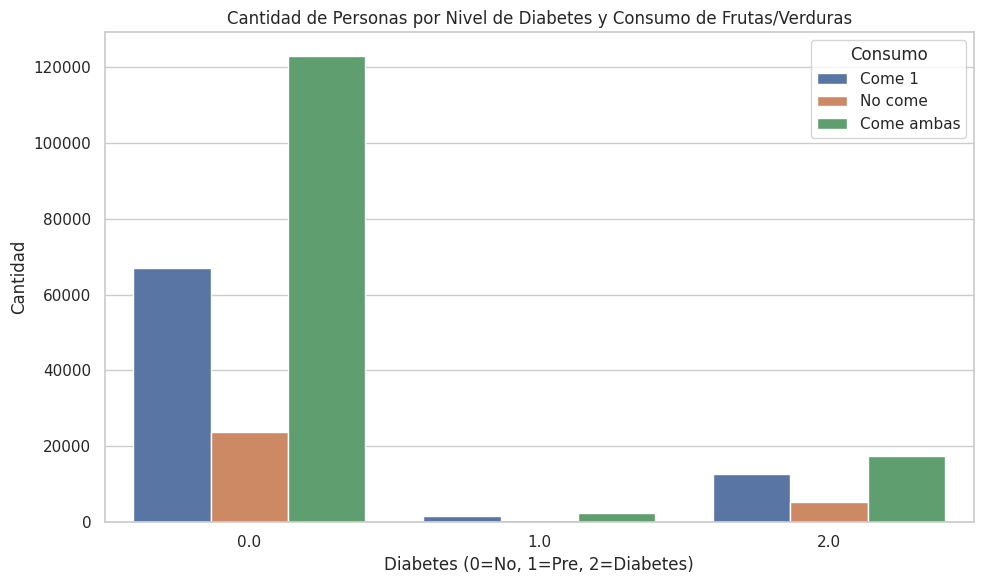

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Diabetes_012", hue="Consumo")
plt.title("Cantidad de Personas por Nivel de Diabetes y Consumo de Frutas/Verduras")
plt.xlabel("Diabetes (0=No, 1=Pre, 2=Diabetes)")
plt.ylabel("Cantidad")
plt.legend(title="Consumo")
plt.tight_layout()
plt.show()

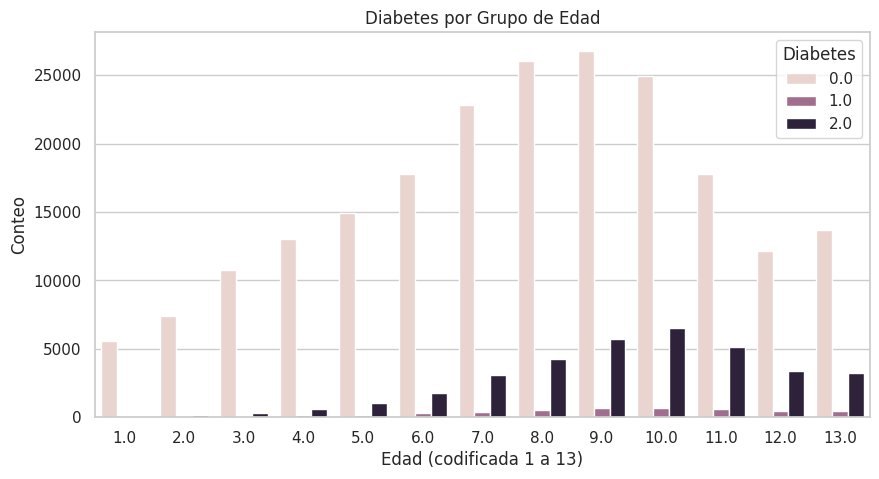

In [11]:
# 4. Edad y diabetes
plt.figure(figsize=(10, 5))
sns.countplot(x="Age", hue="Diabetes_012", data=df)
plt.title("Diabetes por Grupo de Edad")
plt.xlabel("Edad (codificada 1 a 13)")
plt.ylabel("Conteo")
plt.legend(title="Diabetes")
plt.show()


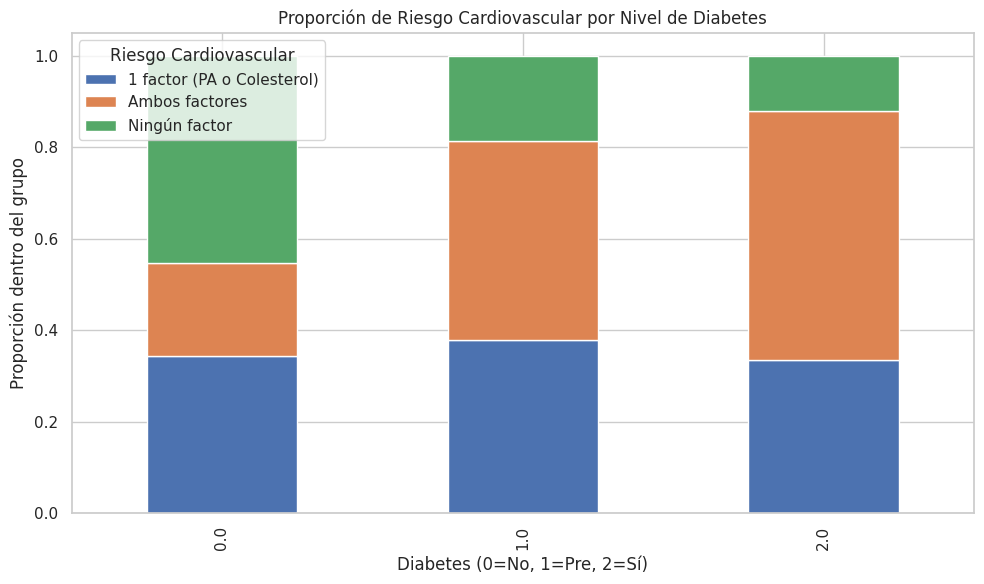

In [28]:

# 6. Riesgo cardiovascular y diabetes
df['RiesgoCardiovascular'] = df['HighBP'] + df['HighChol']
df["RiesgoCV_label"] = df["RiesgoCardiovascular"].map({
    0: "Ningún factor",
    1: "1 factor (PA o Colesterol)",
    2: "Ambos factores"
})

# Tabla cruzada de proporciones por nivel de diabetes
tabla_riesgo = pd.crosstab(df["Diabetes_012"], df["RiesgoCV_label"], normalize='index')

# Graficar
tabla_riesgo.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Proporción de Riesgo Cardiovascular por Nivel de Diabetes")
plt.xlabel("Diabetes (0=No, 1=Pre, 2=Sí)")
plt.ylabel("Proporción dentro del grupo")
plt.legend(title="Riesgo Cardiovascular")
plt.tight_layout()
plt.show()

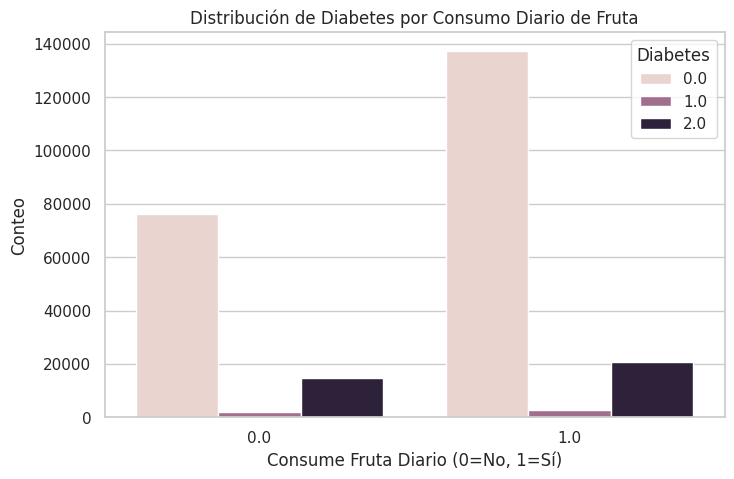

In [13]:
# 7. Frutas y diabetes - comparación directa
plt.figure(figsize=(8, 5))
sns.countplot(x="Fruits", hue="Diabetes_012", data=df)
plt.title("Distribución de Diabetes por Consumo Diario de Fruta")
plt.xlabel("Consume Fruta Diario (0=No, 1=Sí)")
plt.ylabel("Conteo")
plt.legend(title="Diabetes")
plt.show()


In [14]:
# Prueba chi-cuadrado para verificar diferencia significativa
tabla = pd.crosstab(df['Fruits'], df['Diabetes_012'])
chi2, p, dof, expected = chi2_contingency(tabla)
print("\nChi-cuadrado entre 'Fruits' y 'Diabetes_012':")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}")
if p < 0.05:
    print("\u2705 Diferencias estadísticamente significativas: el consumo de fruta está asociado con los niveles de diabetes.")
else:
    print("\u274C No se encontraron diferencias significativas.")


Chi-cuadrado entre 'Fruits' y 'Diabetes_012':
Chi2: 454.3471, p-value: 0.0000
✅ Diferencias estadísticamente significativas: el consumo de fruta está asociado con los niveles de diabetes.


In [15]:
# 1. Proporción de diabetes
print("\nProporción de personas con diabetes:")
print(df['Diabetes_012'].value_counts(normalize=True))


Proporción de personas con diabetes:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [16]:
# 2. Promedio de BMI por grupo de diabetes
print("\nPromedio de BMI por grupo de diabetes:")
print(df.groupby('Diabetes_012')['BMI'].mean())



Promedio de BMI por grupo de diabetes:
Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64


In [17]:
# 3. Prevalencia de diabetes por edad
print("\nDistribución de diabetes por grupo de edad:")
print(df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))



Distribución de diabetes por grupo de edad:
Diabetes_012       0.0       1.0       2.0
Age                                       
1.0           0.982632  0.003684  0.013684
2.0           0.974467  0.007107  0.018426
3.0           0.965297  0.006473  0.028230
4.0           0.944440  0.010273  0.045287
5.0           0.924862  0.010089  0.065049
6.0           0.896362  0.015742  0.087895
7.0           0.866763  0.015885  0.117352
8.0           0.843896  0.017839  0.138265
9.0           0.806431  0.021117  0.172452
10.0          0.774647  0.021650  0.203703
11.0          0.755960  0.025581  0.218459
12.0          0.759199  0.027847  0.212954
13.0          0.789092  0.026090  0.184818


Educación:

| Código | Rango de edad (años) |
| ------ | -------------------- |
| 1      | 18 – 24              |
| 2      | 25 – 29              |
| 3      | 30 – 34              |
| 4      | 35 – 39              |
| 5      | 40 – 44              |
| 6      | 45 – 49              |
| 7      | 50 – 54              |
| 8      | 55 – 59              |
| 9      | 60 – 64              |
| 10     | 65 – 69              |
| 11     | 70 – 74              |
| 12     | 75 – 79              |
| 13     | 80 o más             |


A medida que aumenta la edad, también aumenta la proporción de personas con diabetes tipo 2.

In [31]:
# 4. Diferencias por sexo
print("\nDistribución de diabetes por sexo:")
print(df.groupby('Sex')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))



Distribución de diabetes por sexo:
Diabetes_012       0.0       1.0       2.0
Sex                                       
0.0           0.851980  0.018341  0.129679
1.0           0.830251  0.018146  0.151603


Las mujeres tienen una menor proporción de diabetes (12.9%) en comparación con los hombres (15.2%)

| Valor | Sexo   |
| ----- | ------ |
| 0.0   | Mujer  |
| 1.0   | Hombre |


In [19]:
# 5. Diabetes por ingreso y educación
print("\nDistribución de diabetes por ingreso:")
print(df.groupby('Income')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))



Distribución de diabetes por ingreso:
Diabetes_012       0.0       1.0       2.0
Income                                    
1.0           0.725104  0.032005  0.242891
2.0           0.707884  0.030213  0.261903
3.0           0.750594  0.026322  0.223084
4.0           0.775863  0.022796  0.201341
5.0           0.803307  0.022679  0.174014
6.0           0.834412  0.020510  0.145078
7.0           0.861172  0.017006  0.121821
8.0           0.909211  0.011185  0.079604


Significado de Income:

| Código | Rango de ingreso anual |
| ------ | ---------------------- |
| 1      | Menos de \$10,000      |
| 2      | \$10,000 – \$14,999    |
| 3      | \$15,000 – \$19,999    |
| 4      | \$20,000 – \$24,999    |
| 5      | \$25,000 – \$34,999    |
| 6      | \$35,000 – \$49,999    |
| 7      | \$50,000 – \$74,999    |
| 8      | \$75,000 o más         |


In [30]:
print("\nDistribución de diabetes por educación:")
print(df.groupby('Education')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))



Distribución de diabetes por educación:
Diabetes_012       0.0       1.0       2.0
Education                                 
1.0           0.718391  0.011494  0.270115
2.0           0.667574  0.039822  0.292605
3.0           0.724625  0.033129  0.242245
4.0           0.802135  0.021514  0.176351
5.0           0.832828  0.019067  0.148105
6.0           0.889392  0.013706  0.096902


| Educación             | % sin diabetes (0) | % prediabetes (1) | % diabetes (2) |
| --------------------- | ------------------ | ----------------- | -------------- |
| 1 (sin estudios)      | 71.8%              | 1.1%              | **27.0%**      |
| 2 (primaria)          | 66.8%              | 4.0%              | **29.3%**      |
| 3 (secundaria)        | 72.5%              | 3.3%              | 24.2%          |
| 4 (preparatoria)      | 80.2%              | 2.2%              | 17.6%          |
| 5 (universidad inc.)  | 83.3%              | 1.9%              | 14.8%          |
| 6 (universidad comp.) | **88.9%**          | 1.4%              | **9.7%**       |


A menor nivel educativo, mayor es la proporción de personas con diabetes.

In [29]:
# 6. Relación con salud general percibida
print("\nDistribución por salud general percibida:")
print(df.groupby('GenHlth')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))



Distribución por salud general percibida:
Diabetes_012       0.0       1.0       2.0
GenHlth                                   
1.0           0.967924  0.006910  0.025166
2.0           0.914743  0.013628  0.071629
3.0           0.799262  0.022843  0.177894
4.0           0.657428  0.032468  0.310105
5.0           0.592004  0.029054  0.378942


Valores para GenHlth

| Código | Estado de salud general percibido |
| ------ | --------------------------------- |
| 1      | Excelente                         |
| 2      | Muy buena                         |
| 3      | Buena                             |
| 4      | Regular                           |
| 5      | Mala                              |


A medida que las personas perciben su salud como peor, la proporción de casos de diabetes tipo 2 aumenta considerablemente.

In [22]:
# 7. Factores de riesgo
print("\nPromedio de factores de riesgo por grupo de diabetes:")
print(df.groupby('Diabetes_012')[['Smoker', 'HvyAlcoholConsump', 'HighBP', 'HighChol']].mean())



Promedio de factores de riesgo por grupo de diabetes:
                Smoker  HvyAlcoholConsump    HighBP  HighChol
Diabetes_012                                                 
0.0           0.429680           0.061843  0.371132  0.379171
1.0           0.492766           0.044915  0.629022  0.620816
2.0           0.518220           0.023539  0.752674  0.670118


Presión alta y colesterol alto son los factores de riesgo más relacionados con la diabetes en este dataset.

Fumar también muestra una ligera relación.

Alcohol no parece estar relacionado de forma directa.